# What is a PDF?
#### by Elizabeth Barnes
This example shows the making of a probability density function.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 10.0/2)

We begin by defining two Gaussian random variables: x has length 50 and y has length 1000.

In [2]:
xinc = 0.5

x = np.random.normal(0,1,size = (75,))
y = np.random.normal(0,1,size = (1000,))

Next, we plot the values.

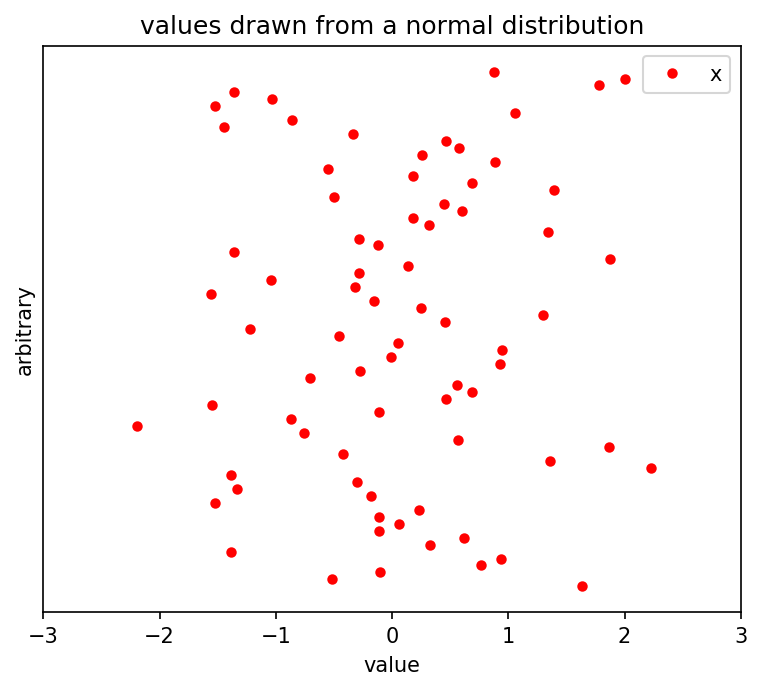

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('value')
plt.ylabel('arbitrary')
plt.yticks([])
plt.title('values drawn from a normal distribution')
plt.xlim(-3,3)

ax.plot(x,np.arange(0,np.size(x)),'.r', markersize = 8, label = 'x')
ax.legend()
plt.show()

Now let's add the 1000 y-values to this scatter mess.

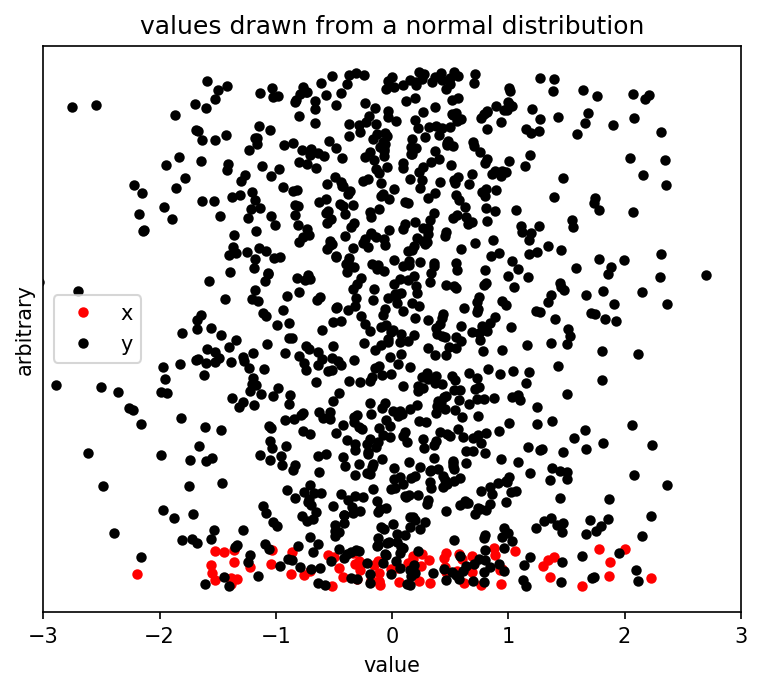

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('value')
plt.ylabel('arbitrary')
plt.yticks([])
plt.title('values drawn from a normal distribution')
plt.xlim(-3,3)

ax.plot(x,np.arange(0,np.size(x)),'.r', markersize = 8, label = 'x')
ax.plot(y,np.arange(0,np.size(y)),'.k', markersize = 8, label = 'y')
ax.legend()
plt.show()

### Making a histogram
While plotting the data in its raw form is incredibly important and useful, sometimes it is difficult to visualize. For example, how many black dots are hiding underneath other black dots? To deal with this, we can display our data in a histogram - that is, discretize our data into bins. Let's add some bins.

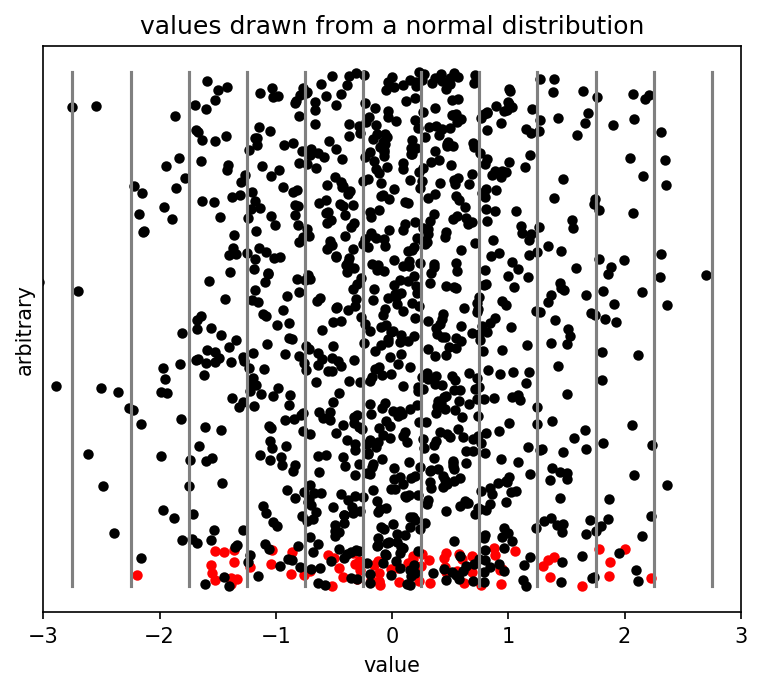

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('value')
plt.ylabel('arbitrary')
plt.yticks([])
plt.title('values drawn from a normal distribution')
plt.xlim(-3,3)

ax.plot(x,np.arange(0,np.size(x)),'.r', markersize = 8, label = 'x')
ax.plot(y,np.arange(0,np.size(y)),'.k', markersize = 8, label = 'y')

xbins = np.arange(-4, 4.5, xinc)
for ind, val in enumerate(xbins[1:]):
    ax.plot([val - 0.25, val-0.25], [0, np.size(y)],'-', color = 'gray')
plt.show()

Now, we count how many values fall within each bin and plot this count on the y-axis.

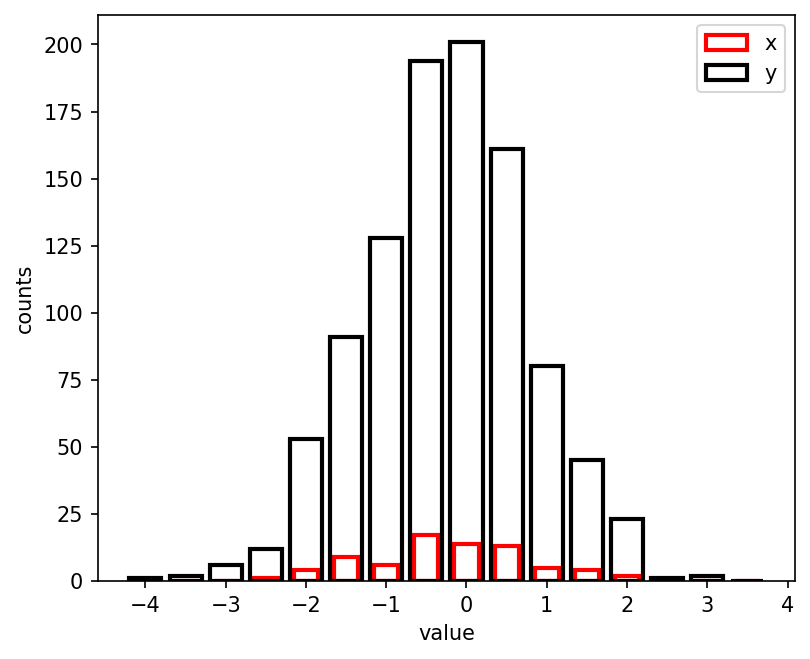

In [6]:
plt.figure()

hx = np.histogram(x,xbins)
hy = np.histogram(y,xbins)

plt.xlabel('value')
plt.ylabel('counts')

plt.bar(hx[1][:-1],hx[0],edgecolor = 'r', color = [], width = .3, label = 'x', linewidth = 2)
plt.bar(hy[1][:-1],hy[0],edgecolor = 'k', color = [], width = .4, label = 'y', linewidth = 2)
plt.legend()
plt.show()

### Normalizing the counts
Our histogram looks great, and we can see that y takes on a Guassian shape, but what about x? It is really hard to see because the counts are so small. This may be what you want to show. However, if the goal is to compare the distributions, then this scaling is not very useful.

Instead, we can turn the counts into units of frequency.

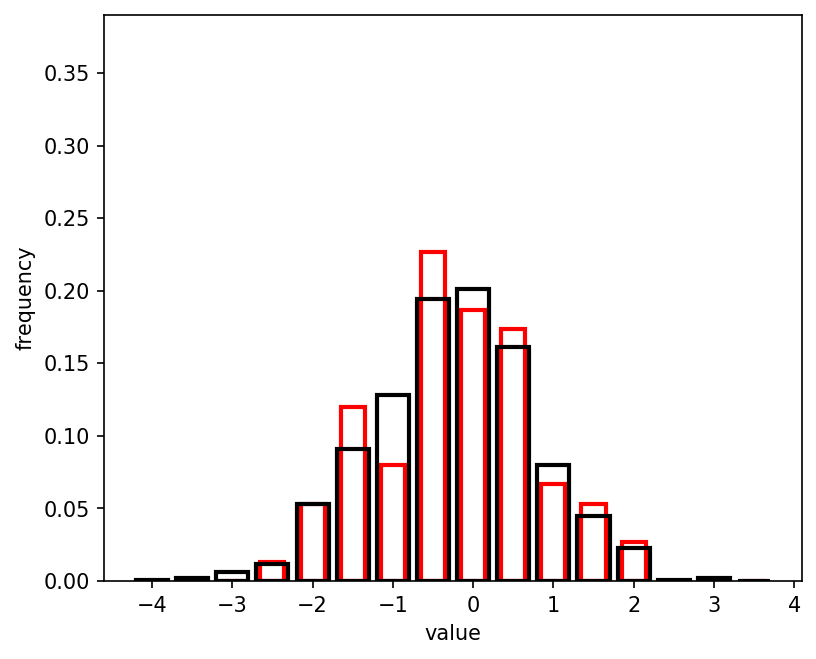

In [7]:
plt.figure()
plt.xlabel('value')
plt.ylabel('frequency')
plt.ylim(0,.39)

plt.bar(hx[1][:-1],hx[0].astype(float)/np.size(x),edgecolor = 'r', color = [], width = .3, linewidth = 2)
plt.bar(hy[1][:-1],hy[0].astype(float)/np.size(y),edgecolor = 'k', color = [], width = .4, linewidth = 2)
plt.show()

Now that the x and y data are on the same footing (normalized to frequency) we can more easily compare the distributions and see that in fact they are both quite similar to one another (although x is less Gaussian-like due to its lower sample size).

One important thing to remember about histograms and frequency plots like the one above is that they are a _dependent on the bin size_ that you choose. For example, what if we quarter our bin size?

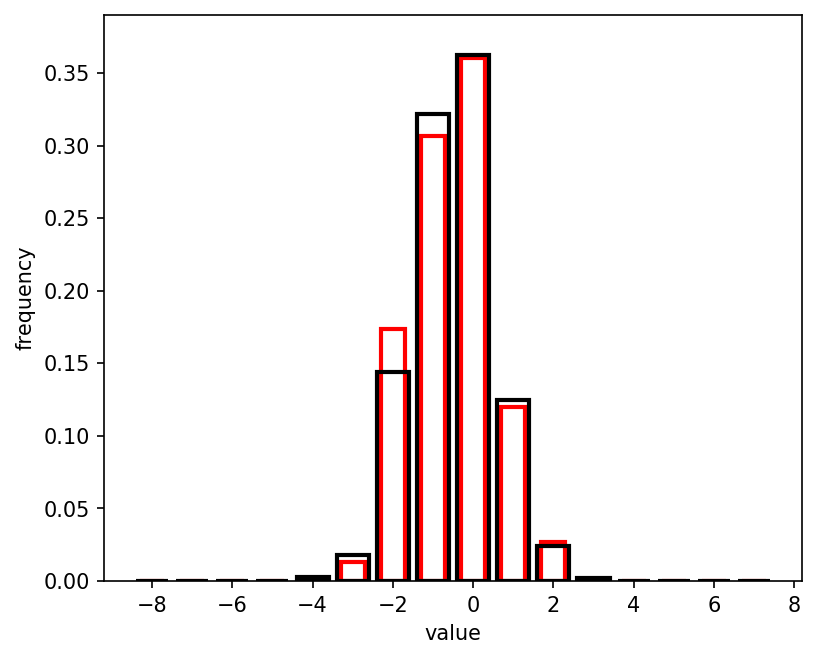

In [8]:
multiplicative_factor = 2.
hx = np.histogram(x,xbins*multiplicative_factor)
hy = np.histogram(y,xbins*multiplicative_factor)

plt.figure()
plt.xlabel('value')
plt.ylabel('frequency')
plt.ylim(0,.39)

plt.bar(hx[1][:-1],hx[0].astype(float)/np.size(x),edgecolor = 'r', color = [], width = .3*multiplicative_factor, linewidth = 2)
plt.bar(hy[1][:-1],hy[0].astype(float)/np.size(y),edgecolor = 'k', color = [], width = .4*multiplicative_factor, linewidth = 2)
plt.show()

Notice how not only do the shapes of the histograms change, but the y-axis changes too. That is, the frequency is completely dependent on how big your bigs are (which makes sense since you are plotting the frequency that a value falls within a bin). However, in many instances, you do not want your plots to be a function of exactly how much data you have...PDF to the rescue!

### Making this a true probability density function (PDF)
A true PDF is continuous, while histograms are certainly discrete. To deal with this, we can plot as a line curve. (Note below I am just going to make my time series a bit longer so the PDF is smoother.

In [9]:
#x = np.random.normal(0,1,size = (10000,))
#y = np.random.normal(0,1,size = (10000,))

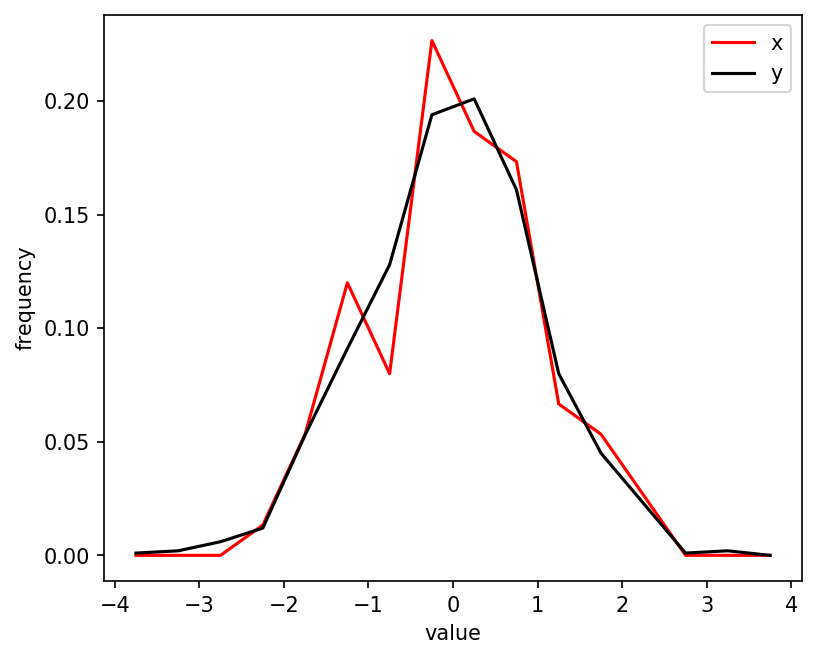

In [10]:
hx = np.histogram(x,xbins)
hy = np.histogram(y,xbins)

plt.figure()

xvals = hx[1][:-1]
fvalsx = hx[0].astype(float)/np.size(x)
fvalsy = hy[0].astype(float)/np.size(y)

plt.plot(xvals+xinc/2,fvalsx,'r', label = 'x')
plt.plot(xvals+xinc/2,fvalsy,'k', label = 'y')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()

plt.show()

However, PDFs have the requirement that the area under the curve (i.e. the total probability) must sum to 1.0. Note that this does not mean the y-vals need to sum to 1.0, but rather, the integral under the curve (which includes the width of the x-axis bins) must sum to 1.0.

In [11]:
[np.sum(fvalsx*xinc), np.sum(fvalsy*xinc)]

[0.49999999999999994, 0.5]

As you can see, the integral does not sum to 1.0, but rather, to 0.5 for both variables. Thus, our actual PDF plot should be scaled by the bin width this (in which case, it becomes independent of our choice of x-axis bin width).

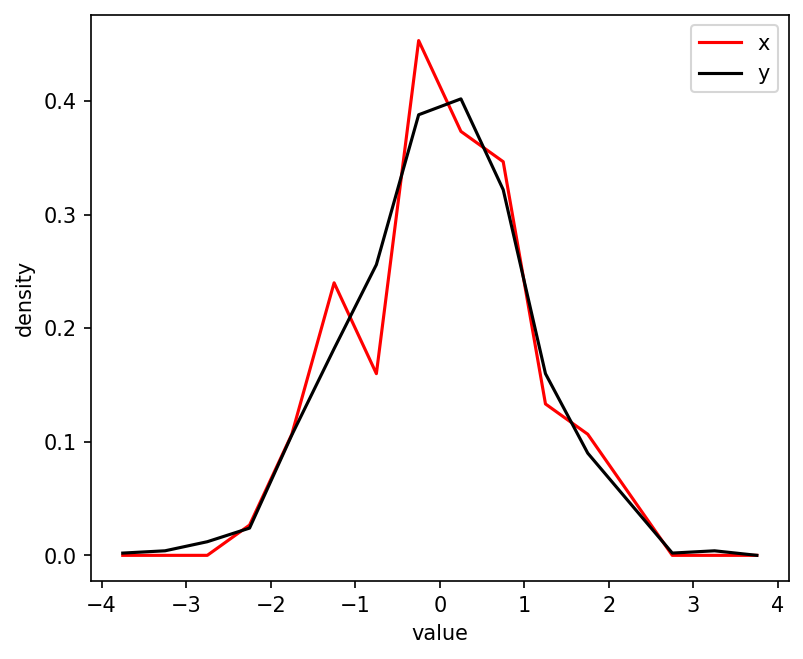

In [14]:
plt.figure()

xvals = hx[1][:-1]
fvalsx = hx[0].astype(float)/(np.size(x)*xinc)
fvalsy = hy[0].astype(float)/(np.size(y)*xinc)

plt.plot(xvals+xinc/2,fvalsx,'r', label = 'x',linewidth=1.5)
plt.plot(xvals+xinc/2,fvalsy,'k', label = 'y',linewidth=1.5)
plt.xlabel('value')
plt.ylabel('density')
plt.legend()

plt.show()

In [15]:
[np.sum(fvalsx)*xinc, np.sum(fvalsy)*xinc]

[0.9999999999999999, 1.0]

### *Pro tip*
The PDFs above aren't very pretty, so often, people estimate smoothed versions of them. There are lots of ways to smooth things (which we will discuss later in this course), but specific to PDF estimation is the use of a "kernel estimator", which acts as a smoother to get a better PDF estimate. This involves determining the values as weighted averages of the points around. The weight is defined by the kernel, such that closer points are given higher weights. In the example below I use a gaussian shaped kernel.

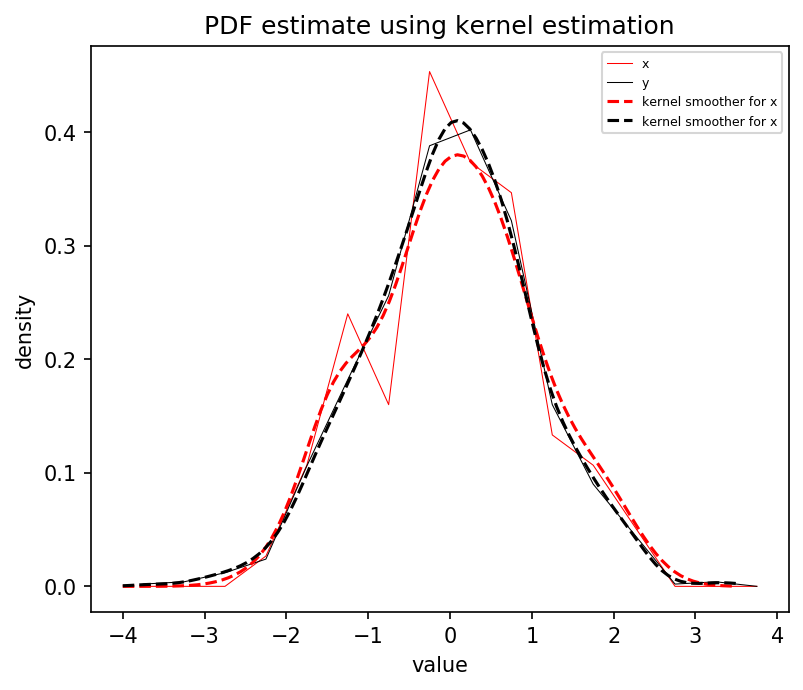

In [16]:
plt.figure()

xvals = hx[1][:-1]
fvalsx = hx[0].astype(float)/(np.size(x)*xinc)
fvalsy = hy[0].astype(float)/(np.size(y)*xinc)

plt.plot(xvals+xinc/2,fvalsx,'r', label = 'x',linewidth=.5)
plt.plot(xvals+xinc/2,fvalsy,'k', label = 'y',linewidth=.5)

xvalsSmooth = np.linspace(np.min(xvals),np.max(xvals),100)
kernel = stats.gaussian_kde(x)
plt.plot(xvalsSmooth,kernel.pdf(xvalsSmooth),linestyle = '--', color = 'r', label = 'kernel smoother for x')
kernel = stats.gaussian_kde(y)
plt.plot(xvalsSmooth,kernel.pdf(xvalsSmooth),linestyle = '--', color = 'k', label = 'kernel smoother for x')

plt.xlabel('value')
plt.ylabel('density')
plt.legend(fontsize=6)
plt.title('PDF estimate using kernel estimation')

plt.show()

### The cumulative density function (CDF)
The cumulative density function (CDF) is a close partner of the PDF, but instead shows the probability that the data will take a value less than or equal to x.

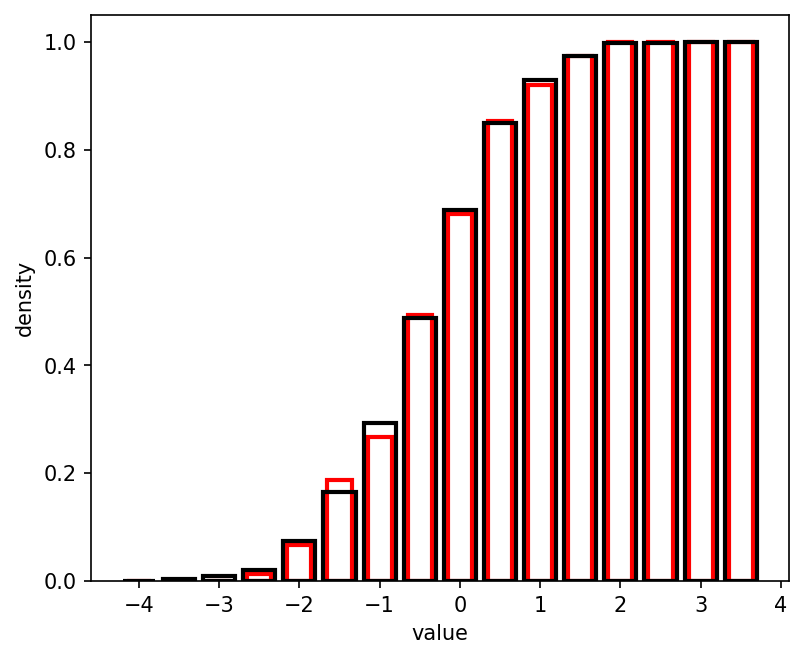

In [17]:
plt.figure()

hxx = np.cumsum(hx[0])
hyy = np.cumsum(hy[0])

plt.xlabel('value')
plt.ylabel('density')

plt.bar(hx[1][:-1],hxx.astype(float)/np.size(x),edgecolor = 'r', color = [], width = .3, linewidth = 2)
plt.bar(hy[1][:-1],hyy.astype(float)/np.size(y),edgecolor = 'k', color = [], width = .4, linewidth = 2)
plt.show()

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/what_is_pdf.ipynb*